# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/vinushirsath/Working-Projects/main/HR%20Analytics.csv?token=GHSAT0AAAAAABY2ZOGZB6766AHJT4VILK7KY4HO4YA")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Finding the shape of dataset
df.shape

(1470, 35)

In [5]:
#Finding info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Finding the null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
#Checking duplicate values

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [12]:
#Describing the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# EDA

<AxesSubplot:xlabel='Age', ylabel='count'>

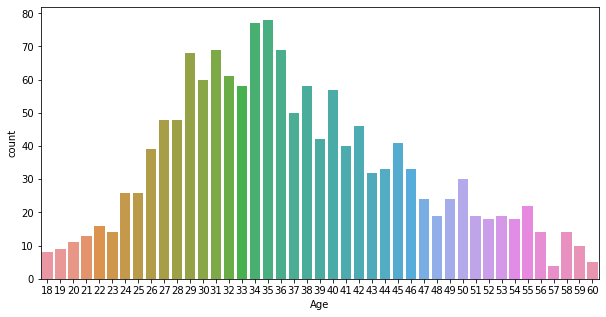

In [13]:
#Lets check agewise peoples are working with company
plt.figure(figsize=(10,5))
sns.countplot(df["Age"])

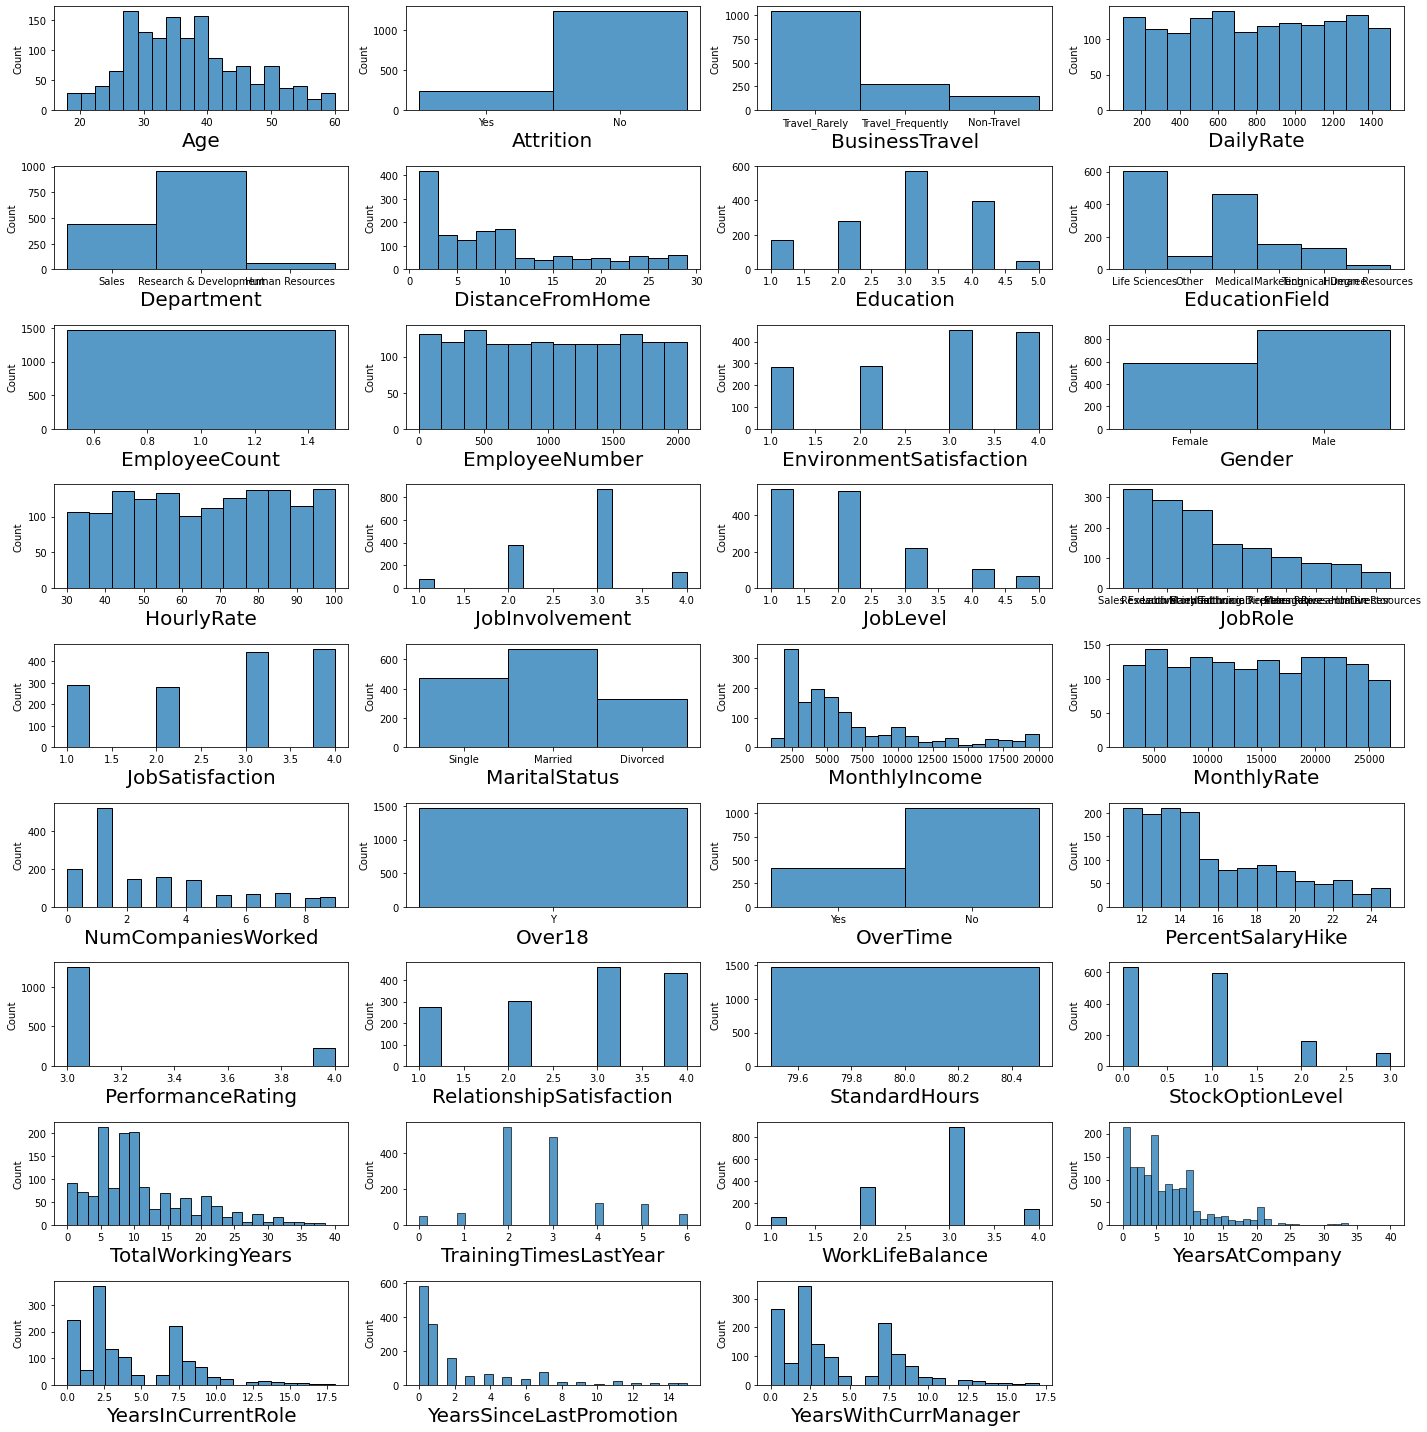

In [14]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(9,4, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [15]:
df_feature= df.drop("Attrition", axis=1)
y= df["Attrition"]

<AxesSubplot:xlabel='Age', ylabel='count'>

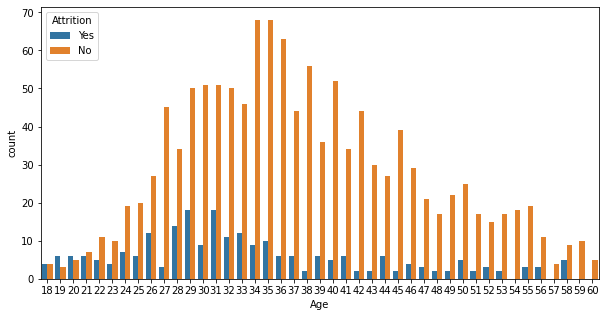

In [16]:
#Plotting Age Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["Age"], hue=df["Attrition"])


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

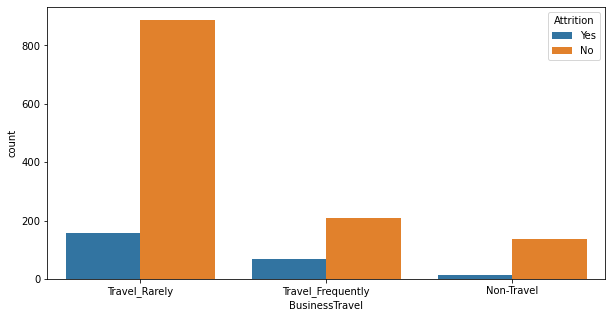

In [17]:
#Plotting Business Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["BusinessTravel"], hue=df["Attrition"])


<AxesSubplot:xlabel='Department', ylabel='count'>

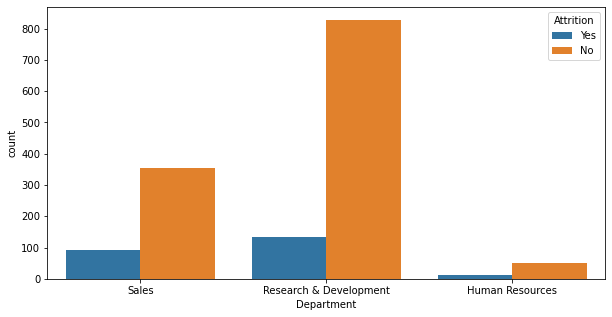

In [18]:
#Plotting Department Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["Department"], hue=df["Attrition"])


<AxesSubplot:xlabel='Education', ylabel='count'>

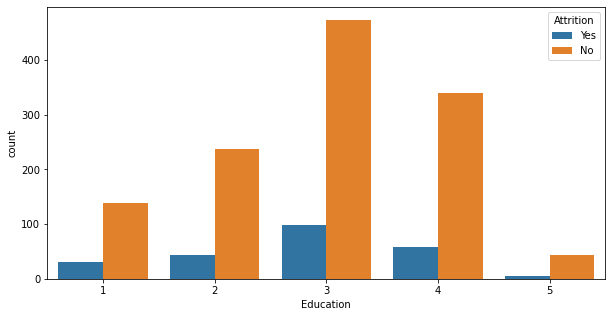

In [19]:
#Plotting Education Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["Education"], hue=df["Attrition"])


<AxesSubplot:xlabel='EducationField', ylabel='count'>

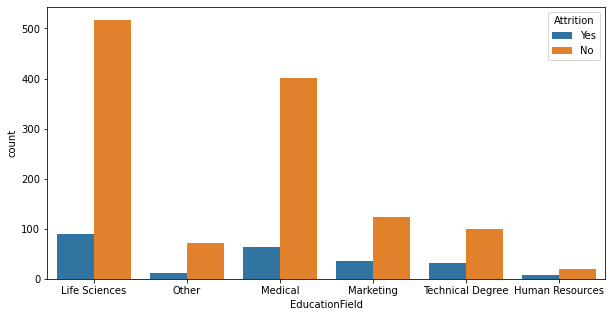

In [20]:
#Plotting Education Field Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["EducationField"], hue=df["Attrition"])


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

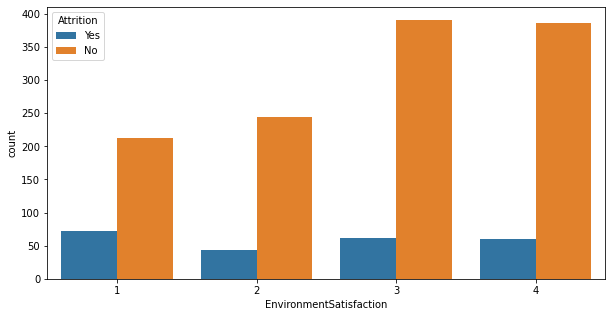

In [21]:
#Plotting Environment Satisfaction Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["EnvironmentSatisfaction"], hue=df["Attrition"])


<AxesSubplot:xlabel='Gender', ylabel='count'>

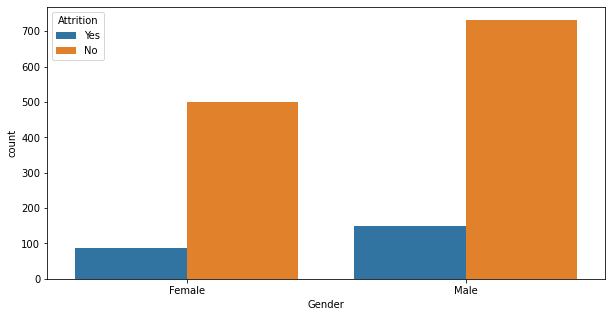

In [22]:
#Plotting Gender Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["Gender"], hue=df["Attrition"])


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

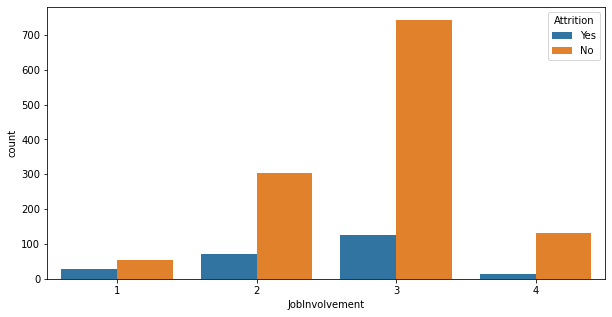

In [23]:
#Plotting Job Involvement Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["JobInvolvement"], hue=df["Attrition"])


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

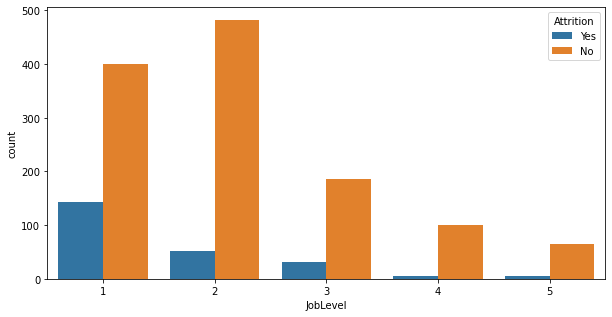

In [24]:
#Plotting Job Level Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["JobLevel"], hue=df["Attrition"])


<AxesSubplot:xlabel='JobRole', ylabel='count'>

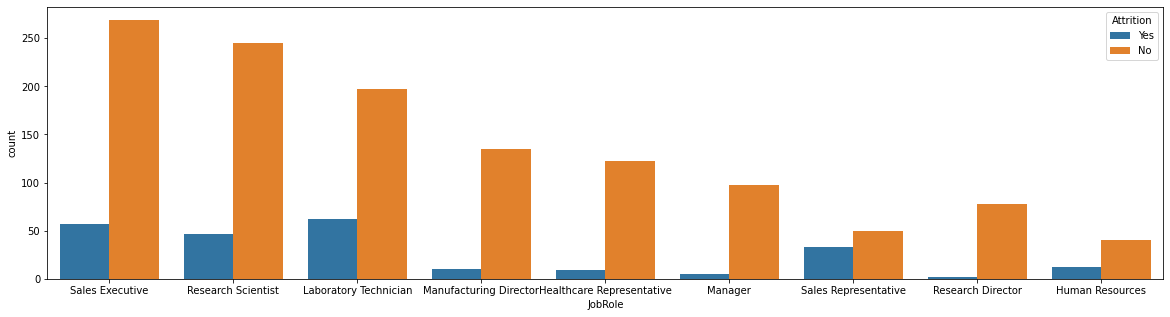

In [25]:
#Plotting Job Role Vs Attrition
plt.figure(figsize=(20,5))
sns.countplot(df["JobRole"], hue=df["Attrition"])


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

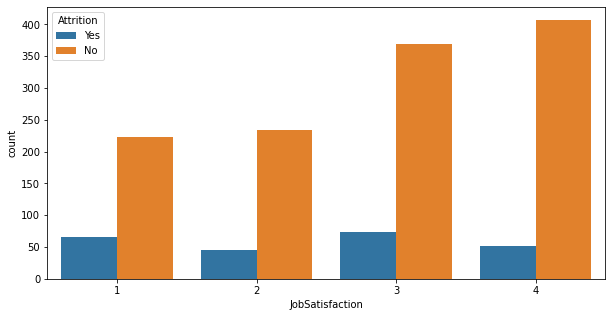

In [26]:
#Plotting Job Satisfaction Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["JobSatisfaction"], hue=df["Attrition"])


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

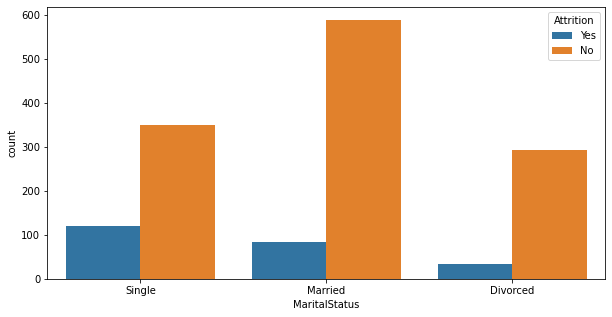

In [27]:
#Plotting Marital Status Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["MaritalStatus"], hue=df["Attrition"])


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

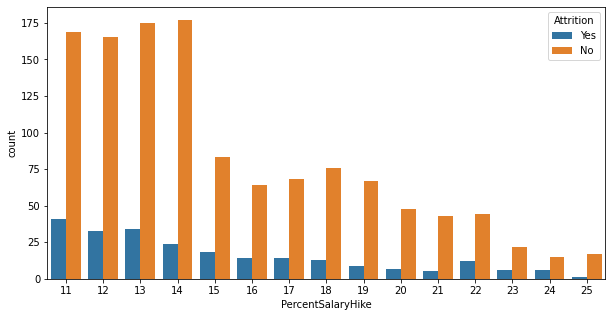

In [28]:
#Plotting Percent Salary Hike Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["PercentSalaryHike"], hue=df["Attrition"])


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

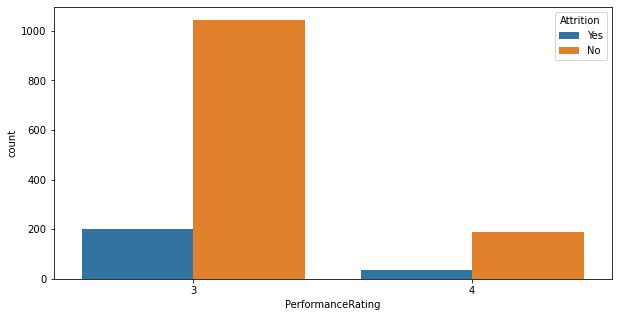

In [29]:
#Plotting Performace Rating Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["PerformanceRating"], hue=df["Attrition"])


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

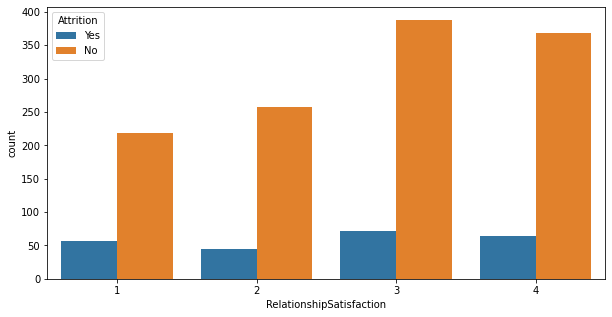

In [30]:
#Plotting Relationship Satisfaction Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["RelationshipSatisfaction"], hue=df["Attrition"])


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

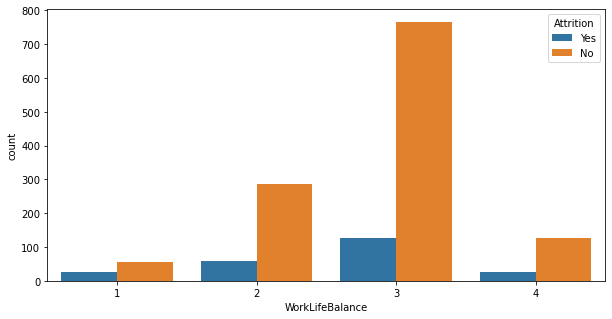

In [31]:
#Plotting Work Life Balance Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["WorkLifeBalance"], hue=df["Attrition"])


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

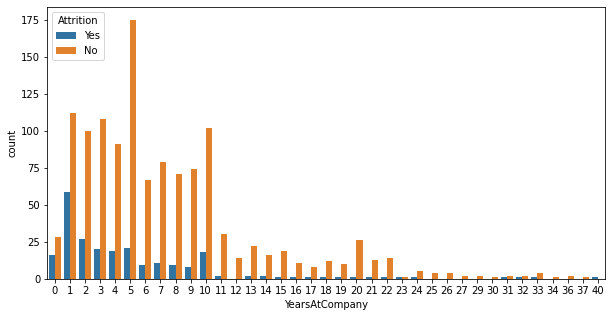

In [32]:
#Plotting Years at company Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["YearsAtCompany"], hue=df["Attrition"])


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

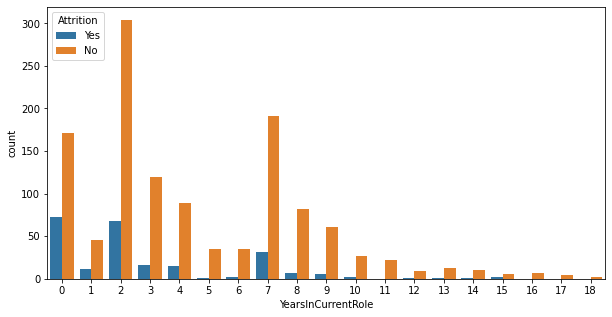

In [33]:
#Plotting Years in current role Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["YearsInCurrentRole"], hue=df["Attrition"])


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

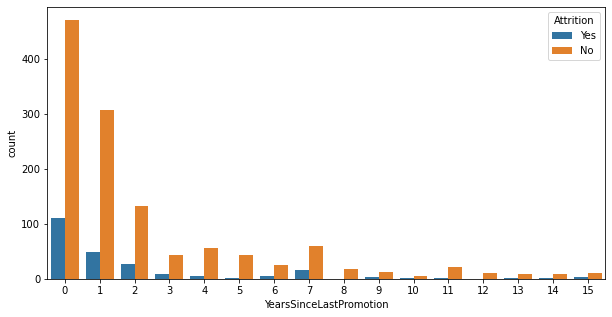

In [34]:
#Plotting Years since last promotion Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["YearsSinceLastPromotion"], hue=df["Attrition"])


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

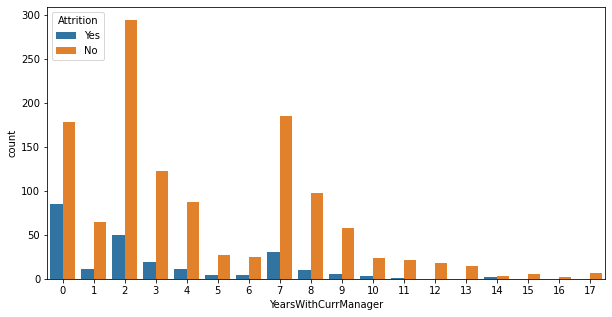

In [35]:
#Plotting Years with current manager Vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(df["YearsWithCurrManager"], hue=df["Attrition"])


Plotting the graph of performance Rating Vs Percent of Salary Hike

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

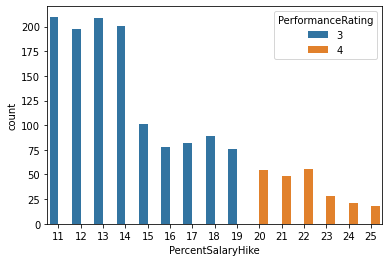

In [36]:
sns.countplot(df["PercentSalaryHike"], hue=df["PerformanceRating"])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

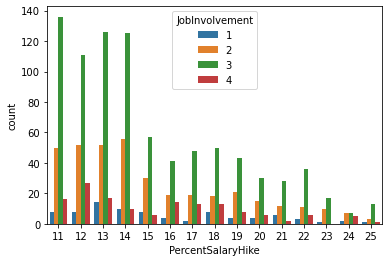

In [273]:
sns.countplot(df["PercentSalaryHike"],hue=df["JobInvolvement"])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

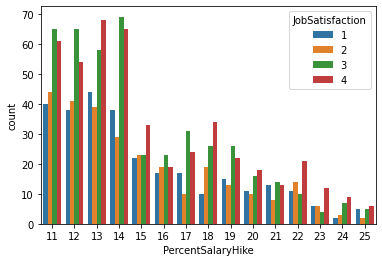

In [270]:
sns.countplot(df["PercentSalaryHike"],hue=df["JobSatisfaction"])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

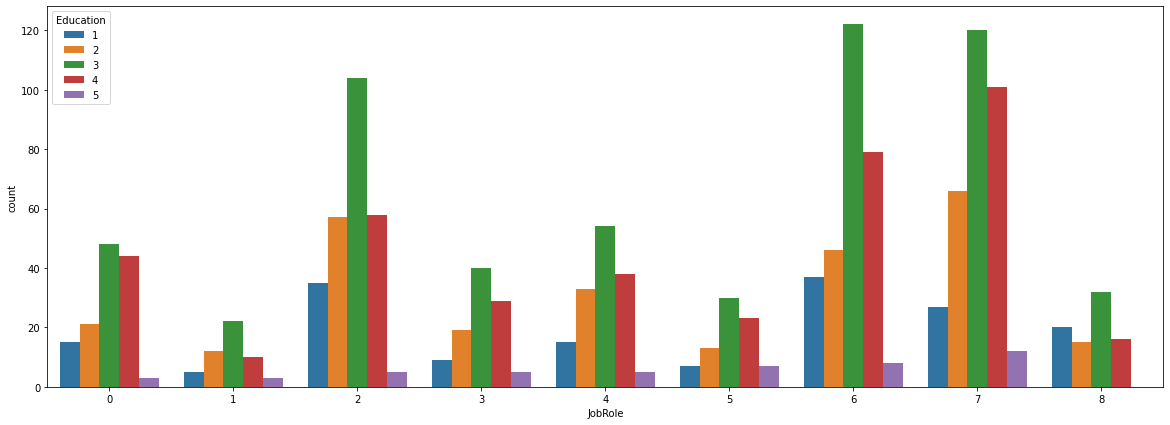

In [278]:
plt.figure(figsize=(20,7))
sns.countplot(df["JobRole"], hue=df["Education"])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

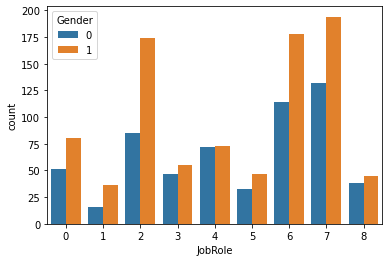

In [282]:
sns.countplot(df["JobRole"], hue=df["Gender"])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

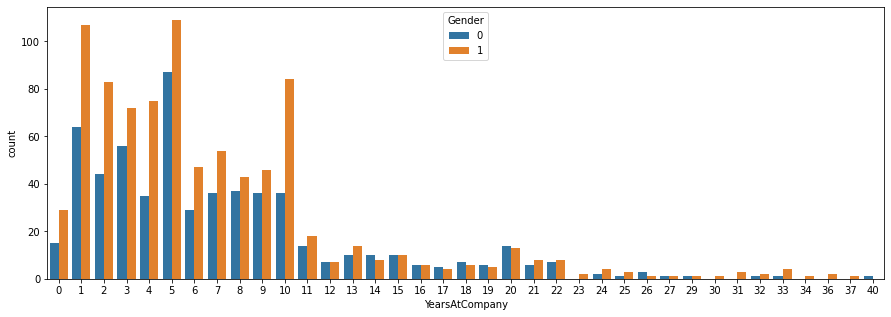

In [285]:
plt.figure(figsize=(15,5))
sns.countplot(df["YearsAtCompany"], hue=df["Gender"])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

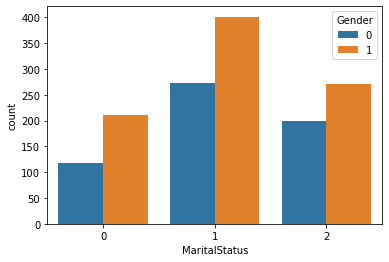

In [286]:
sns.countplot(df["MaritalStatus"], hue=df["Gender"])

In [ ]:
-Married male employess are more in nos. followed by female married employees.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

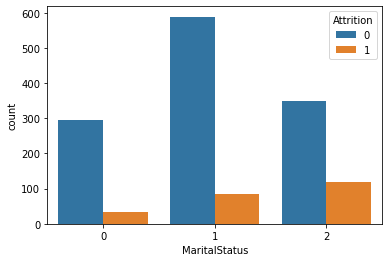

In [287]:
sns.countplot(df["MaritalStatus"], hue=df["Attrition"])

In [ ]:
-Divorced employees are more in nos. who are leaving the organisation, follwed by married employees.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

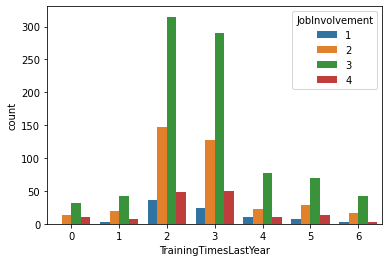

In [292]:
sns.countplot(df["TrainingTimesLastYear"], hue=df["JobInvolvement"])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

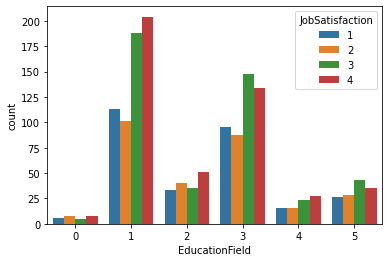

In [293]:
sns.countplot(df["EducationField"], hue=df["JobSatisfaction"])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

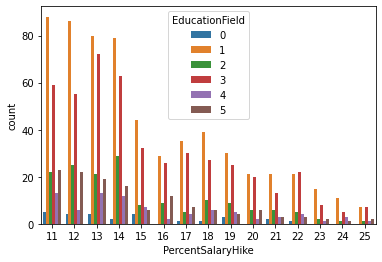

In [295]:
sns.countplot(df["PercentSalaryHike"], hue=df["EducationField"])

In [ ]:
-Life science employess are getting highest salary hike, folllowed by medical employees.

# Data Encoding using label encoder

In [184]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [186]:
cols=['OverTime', 'Over18','MaritalStatus', 'JobRole','Gender','EducationField','Department', 'BusinessTravel', 'Attrition']

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [188]:
#Lets decribe again
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

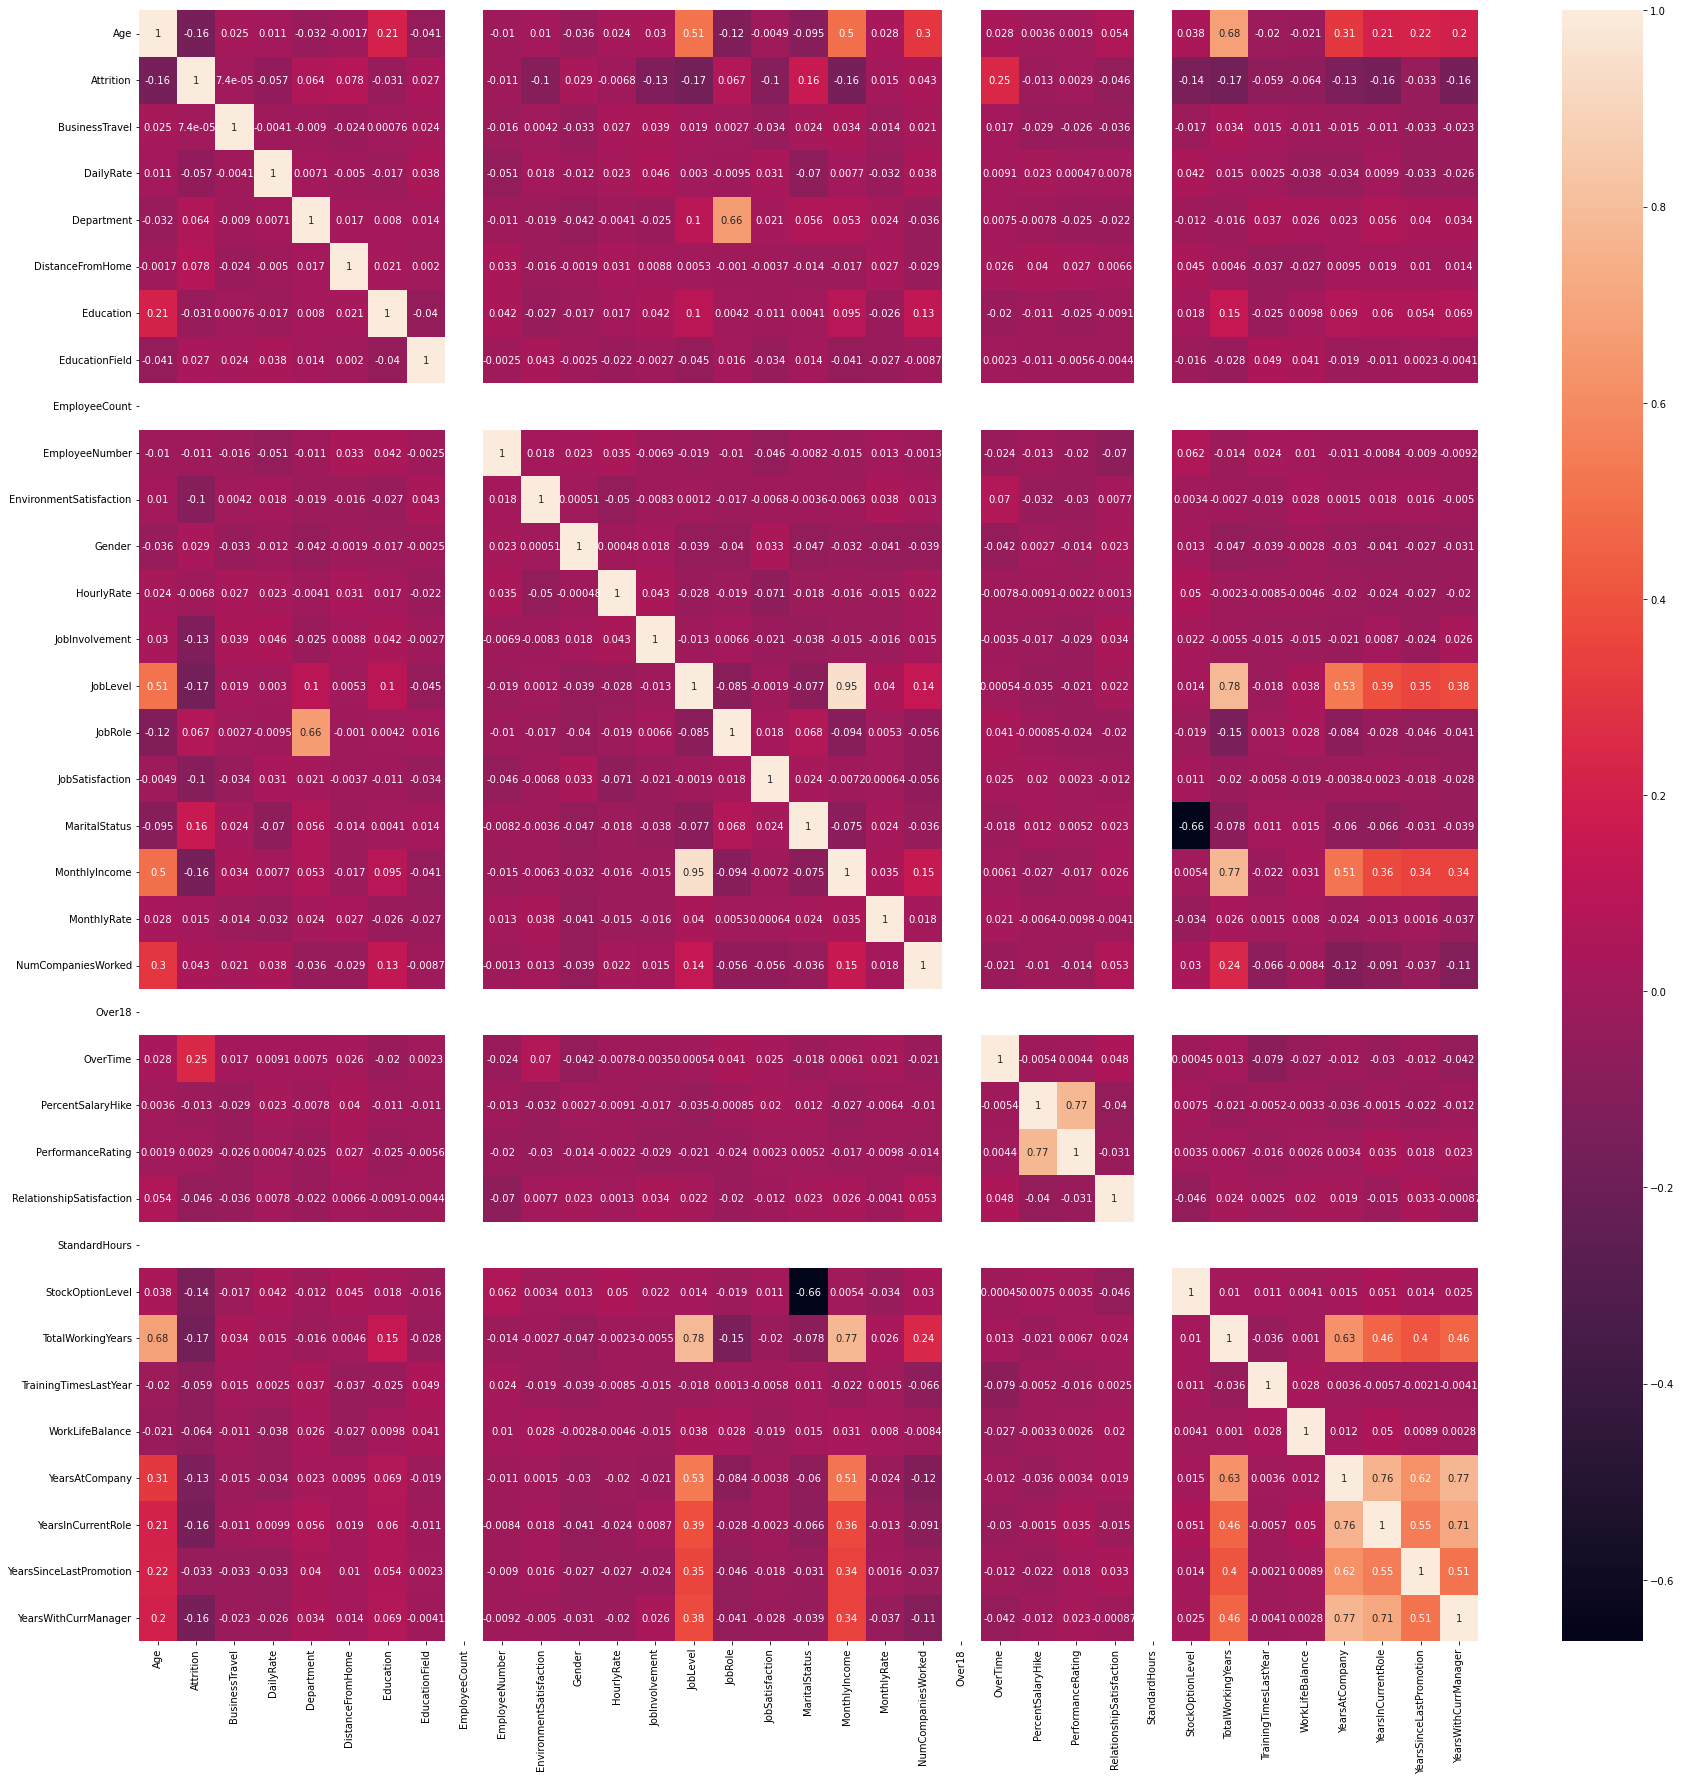

In [189]:
#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

# Scaling using Standard scalar

In [190]:
x=df.drop("Attrition", axis=1)
y=df["Attrition"]

In [191]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [266]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,NaN,EmployeeCount
8,1.022699,EmployeeNumber
9,1.018022,EnvironmentSatisfaction


In [ ]:
#if vif is less than 5 then it shows that their is no multicolinearity between features.
#Job level & Monthly income having 11% colinearity 
#So we can go ahead for fitting the model. before that we can split data in train test split

In [192]:
#Finding the shape of X
x_scaled.shape

(1470, 34)

# Train Test Split

In [193]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [194]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        


# Model Initialisatiion using Decision Tree classifier

In [195]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [196]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:77.45%

 
 classification report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       300
           1       0.38      0.35      0.37        68

    accuracy                           0.77       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.77      0.77      0.77       368



In [197]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [198]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [124]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [125]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [126]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "entropy", max_depth= 10,min_samples_split=2, max_leaf_nodes= 9, min_samples_leaf=3 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=3)

In [127]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:87.30%

 =============Test Result================
Accuracy score:81.52%

 
 classification report 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       300
           1       0.50      0.16      0.24        68

    accuracy                           0.82       368
   macro avg       0.67      0.56      0.57       368
weighted avg       0.77      0.82      0.77       368



In [199]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [200]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[261,  39],
       [ 44,  24]], dtype=int64)

In [202]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [204]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.   0.13 1.  ]
True Positive Rate [0.         0.35294118 1.        ]
Threshold [2 1 0]


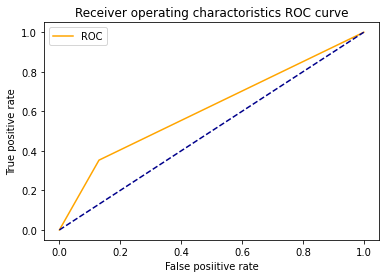

In [206]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [207]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6114705882352942


In [208]:
#Saving the model in local file system 
import pickle

pickle.dump(clf, open("hr_clf1", "wb"))

In [209]:
loaded_model=pickle.load(open("hr_clf1", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

77.44565217391305


In [215]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])


In [216]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Original,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Using Knn Classifier

In [217]:

from sklearn.model_selection import KFold, cross_val_score

In [218]:
#Building model to test unexposed data

x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [219]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [220]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:87.84%

 =============Test Result================
Accuracy score:82.34%

 
 classification report 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       300
           1       0.67      0.09      0.16        68

    accuracy                           0.82       368
   macro avg       0.75      0.54      0.53       368
weighted avg       0.80      0.82      0.76       368



In [221]:
#Cross Validation

cross_val_score(knn, x_scaled, y, cv=5)

array([0.84353741, 0.82993197, 0.85034014, 0.84693878, 0.85034014])

In [222]:
#Finding mean CV score
cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()

0.84421768707483

In [223]:
#Parameter tunning using grid search cv

In [224]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [146]:
gridsearch= GridSearchCV(estimator=knn, param_grid=param_grid)

In [147]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [225]:
#Finding the best parameters

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 7}

In [226]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [227]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:86.57%

 =============Test Result================
Accuracy score:82.34%

 
 classification report 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       300
           1       0.67      0.09      0.16        68

    accuracy                           0.82       368
   macro avg       0.75      0.54      0.53       368
weighted avg       0.80      0.82      0.76       368



In [228]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [229]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[297,   3],
       [ 62,   6]], dtype=int64)

# Lets plot ROC, AUC curve to chose best model

In [230]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [231]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.   0.01 1.  ]
True Positive Rate [0.         0.08823529 1.        ]
Threshold [2 1 0]


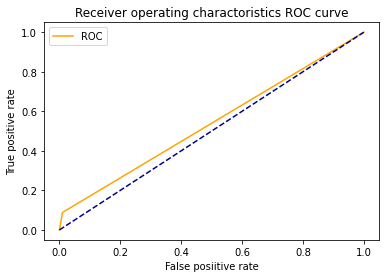

In [232]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [233]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.5391176470588235


In [235]:
#Saving the model in local file system 
import pickle

pickle.dump(knn, open("hr_clf2", "wb"))

In [236]:
loaded_model1=pickle.load(open("hr_clf2", "rb"))
result=loaded_model1.score(x_test, y_test)
print(result*100)

82.33695652173914


In [237]:
#Model score 82%

In [238]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Random Forest

In [239]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)


RandomForestClassifier()

In [240]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:83.42%

 
 classification report 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       300
           1       0.77      0.15      0.25        68

    accuracy                           0.83       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.82      0.83      0.78       368



Lets tune parameters using GridSearchCV

In [241]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [242]:
random_clf=RandomForestClassifier(criterion= 'gini', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators= 13)


random_clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=13)

In [243]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:89.11%

 =============Test Result================
Accuracy score:82.88%

 
 classification report 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       300
           1       0.78      0.10      0.18        68

    accuracy                           0.83       368
   macro avg       0.80      0.55      0.54       368
weighted avg       0.82      0.83      0.77       368



In [245]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [246]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[298,   2],
       [ 61,   7]], dtype=int64)

In [250]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("hr_clf3", "wb"))

In [251]:
loaded_model=pickle.load(open("hr_clf3", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

82.88043478260869


In [252]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Logistic Regression

In [253]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [254]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [255]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8586956521739131

In [256]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[294,   6],
       [ 46,  22]], dtype=int64)

In [257]:
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)

metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:88.20%

 =============Test Result================
Accuracy score:85.87%

 
 classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       300
           1       0.79      0.32      0.46        68

    accuracy                           0.86       368
   macro avg       0.83      0.65      0.69       368
weighted avg       0.85      0.86      0.83       368



# Lets plot ROC, AUC curve to chose best model

In [262]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [263]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.   0.02 1.  ]
True Positive Rate [0.         0.32352941 1.        ]
Threshold [2 1 0]


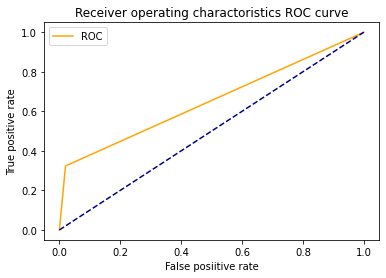

In [264]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [265]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6517647058823529


In [258]:
#Saving the model in local file system 
import pickle

pickle.dump(log_reg, open("hr_clf4", "wb"))

In [259]:
loaded_model=pickle.load(open("hr_clf4", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

85.86956521739131


In [260]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Original,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Summary of Project: